In [ ]:
# IMPORT LIBRARY
import numpy as np #mengolah data yang berbentuk array 
import pandas as pd #membaca file dan display tabel
import matplotlib.pyplot as plt

In [ ]:
# PACKAGE UNTUK MEMBUAT PLOT DALAM BENTUK DIAGRAM BATANG
import seaborn as sns 
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# SHILHOUETTE SCORE DIGUNAKAN UNTUK MENGUKUR KULAITAS CLUSTER YANG TERBENTUK
from sklearn.metrics import silhouette_score

# STANDARD SCALER UNTUK MELAKUKAN PREPROCESSING, MENYERAGAMKAN RENTANG NILAI DATA PADA DATASET
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Dataset yang diambil yaitu dari dataset Insiden dan Tingkat Total Kejahatan Di Kota Chhattisgarh dari tahun 2005 hingga 2009
dataset = pd.read_excel('/content/cyber crime data.xlsx')
print(dataset)

    Year  Tipe Kejahatan  Jumlah Kejahatan  Total Pelaku Ditangkap
0   2005               0                18                      24
1   2005               1                28                      51
2   2006               0                 1                       1
3   2006               1                30                      37
4   2007               0                 5                       4
5   2007               1                52                      82
6   2008               0                 1                       1
7   2008               1                19                      24
8   2009               0                 4                       7
9   2009               1                46                      44
10  2010               0                 4                       7
11  2010               1                46                      44
12  2011               0                 2                       2
13  2011               1                76                    

In [ ]:
# Pengecekan nilai null (kosong) pada tiap kolom dalam dataset
dataset.isnull().sum().sort_values(ascending=False)

Year                      0
Tipe Kejahatan            0
Jumlah Kejahatan          0
Total Pelaku Ditangkap    0
dtype: int64

In [ ]:
# Preprocessing dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)

df = pd.DataFrame(scaled_data, columns = dataset.columns)
print(df)

        Year  Tipe Kejahatan  Jumlah Kejahatan  Total Pelaku Ditangkap
0  -1.620185            -1.0         -0.239615               -0.121802
1  -1.620185             1.0          0.119807                0.791710
2  -1.388730            -1.0         -0.850632               -0.899978
3  -1.388730             1.0          0.191692                0.318037
4  -1.157275            -1.0         -0.706863               -0.798477
5  -1.157275             1.0          0.982420                1.840557
6  -0.925820            -1.0         -0.850632               -0.899978
7  -0.925820             1.0         -0.203672               -0.121802
8  -0.694365            -1.0         -0.742805               -0.696976
9  -0.694365             1.0          0.766767                0.554874
10 -0.462910            -1.0         -0.742805               -0.696976
11 -0.462910             1.0          0.766767                0.554874
12 -0.231455            -1.0         -0.814690               -0.866144
13 -0.

<function matplotlib.pyplot.show(*args, **kw)>

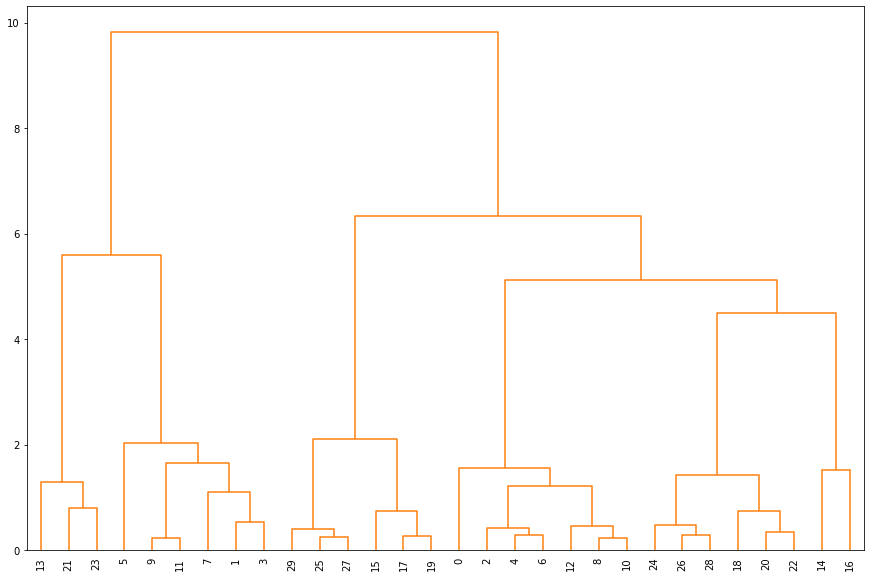

In [ ]:
# Visualisasi dendogram
plt.figure(figsize=(15,10))
dendrogram(linkage(df,method="ward"), leaf_rotation=90, p=5, color_threshold=20, leaf_font_size=10)
plt.show

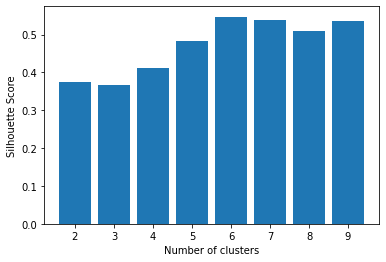

In [ ]:
# mencari jumlah cluster terbaik dengan Silhouette Scores
silhouette_scores = []

for n_cluster in range(2,10):
  silhouette_scores.append(
    silhouette_score(df, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(df)))

plt.bar(range(2,10), silhouette_scores)
plt.xlabel('Number of clusters', fontsize=10)
plt.ylabel('Silhouette Score', fontsize=10)
plt.show()

In [ ]:
#  Agglomerative clustering dengan jumlah cluster 6
agglo = AgglomerativeClustering(n_clusters=6)
agglo.fit(df)
labels = agglo.labels_
hasil_agglo = pd.concat([df, pd.DataFrame({'cluster':labels})], axis=1)
print(hasil_agglo)

           x         y  label  cluster
0  -0.542828 -2.745079      1        2
1   3.181822 -1.308475      0        0
2  -1.819479 -1.964485      1        1
3   3.121166 -1.146016      0        0
4  -1.979212 -1.985445      1        1
5   3.816780 -0.939047      0        0
6  -2.384257 -1.653592      1        1
7   2.395638 -0.392990      0        0
8  -2.589268 -1.648310      1        1
9   4.034353 -0.470071      0        0
10 -2.911357 -1.376404      1        1
11  4.104092 -0.119645      0        0
12 -3.207375 -0.905037      1        1
13  3.666963 -0.282347      0        0
14 -0.053811 -1.558288      1        2
15  2.362715  1.602372      2        5
16  1.096051 -0.896124      1        2
17  0.749816  2.011110      2        4
18 -3.531182  0.085642      1        3
19  0.345081  2.282427      2        4
20 -3.236238  0.313892      1        3
21  3.361221  0.465826      0        0
22 -2.886993  0.592022      1        3
23  3.222403  0.401911      0        0
24 -3.174682  0.957899   

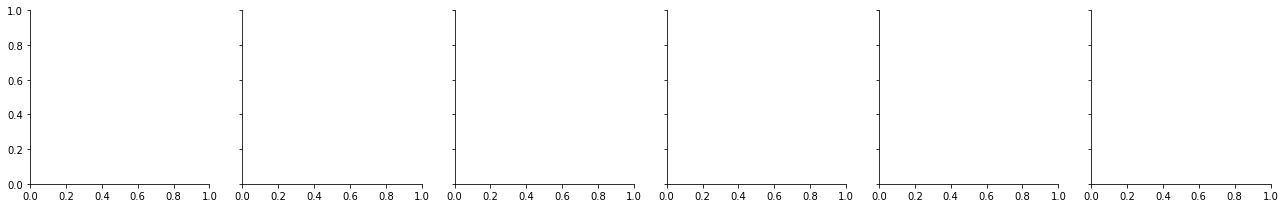

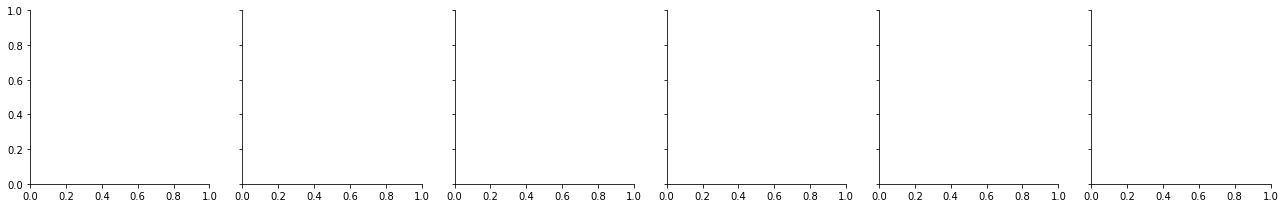

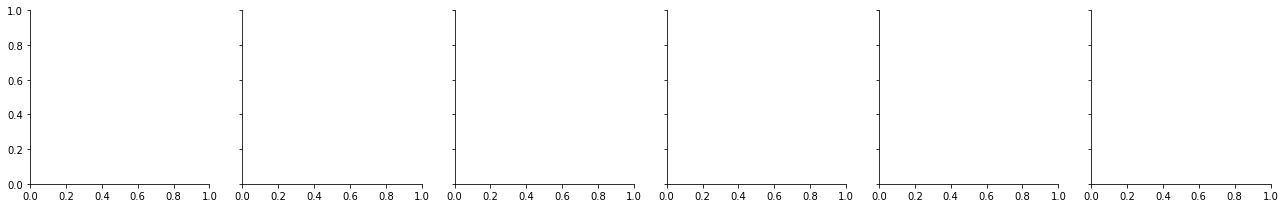

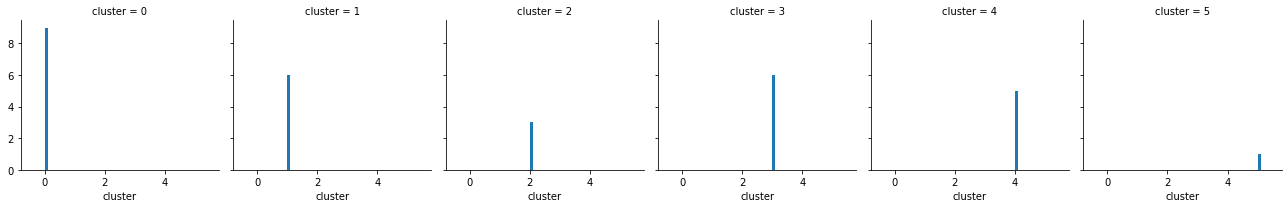

In [ ]:
for i in hasil_agglo: grid = sns.FacetGrid(hasil_agglo, col='cluster')
grid.map(plt.hist,i)

In [ ]:
dist = 1 - cosine_similarity(df)

pca = PCA(n_components = 2)
pca = pca.fit_transform(dist)

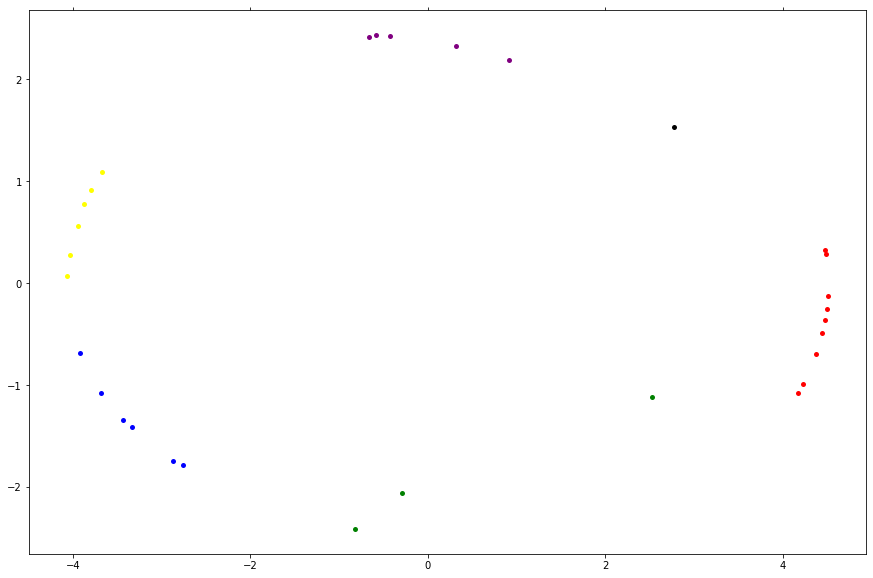

In [ ]:
# Visualisasi penyebaran agglomerative clustering

x, y = pca[:,0], pca[:,1]

warna = {0: 'red',
         1: 'blue',
         2: 'green',
         3: 'yellow',
         4: 'purple',
         5: 'black'}

label_pca = {0: 'cluster 0',
             1: 'cluster 1',
             2: 'cluster 2',
             3: 'cluster 3',
             4: 'cluster 4',
             5: 'cluster 5'}
df = pd.DataFrame({'x' : x, 'y' : y, 'label' : labels})
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(15,10))

for name, group in groups: ax.plot(group.x, group.y, marker='o', linestyle= '', ms=5, color=warna[name], label=label_pca[name], mec = 'none')
ax.set_aspect('auto')
ax.tick_params(axis='x', which='both',bottom='off',top='off',labelbottom='off')
ax.tick_params(axis='y', which='both',left='off',top='off',labelleft='off')